In [2]:
import pandas as pd

file_path = 'walmart.xlsx'
data = pd.ExcelFile(file_path)

sheet_names = data.sheet_names
sheet_names


['walmart Retail Data']

In [3]:
df = data.parse(sheet_names[0])
df.head()


,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [4]:
# Convert 'Order Date' to datetime and aggregate sales by date
df['Order Date'] = pd.to_datetime(df['Order Date'])
time_series = df.groupby('Order Date')['Sales'].sum()

time_series.head()


Order Date
2012-01-01     1052.8400
2012-01-02    11101.8700
2012-01-03    31997.8555
2012-01-04     1254.2500
2012-01-05    39734.4040
Name: Sales, dtype: float64

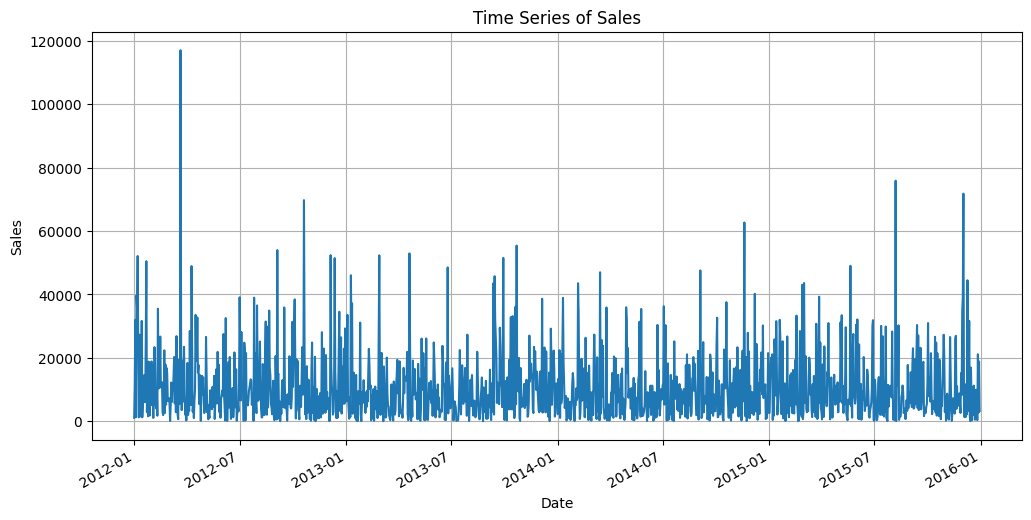

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series of Sales', xlabel='Date', ylabel='Sales', grid=True)
plt.show()


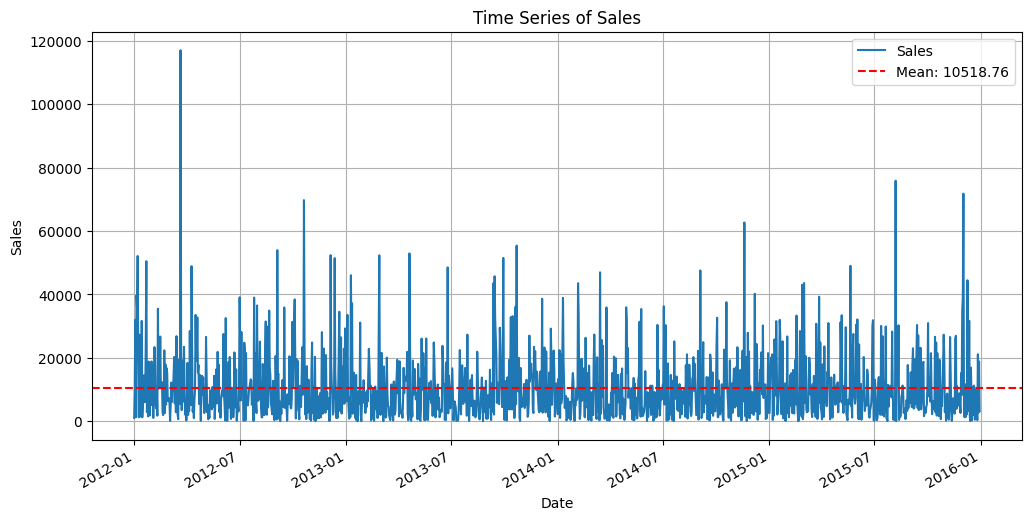

In [6]:
import matplotlib.pyplot as plt
mean_value = time_series.mean()

plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series of Sales', xlabel='Date', ylabel='Sales', grid=True)
plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()


## Autocorrelation using ACF, PACF

<Figure size 1000x600 with 0 Axes>

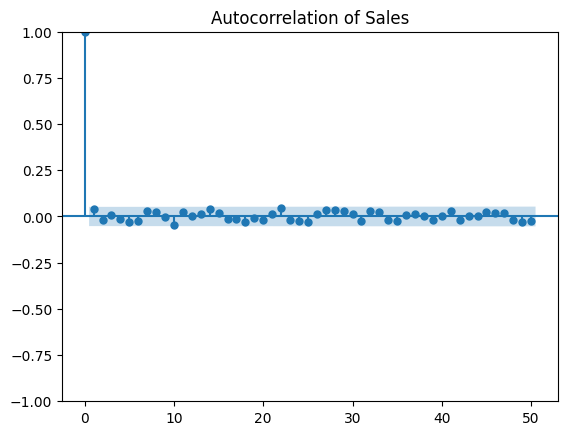

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=50, title="Autocorrelation of Sales")
plt.show()

<Figure size 1000x600 with 0 Axes>

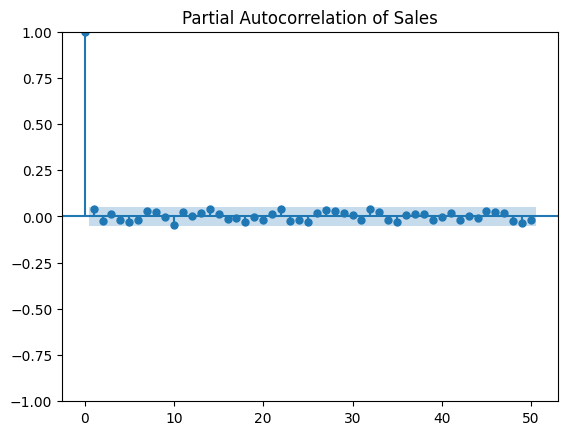

In [8]:
# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=50, title="Partial Autocorrelation of Sales", method='ywm')
plt.show()

## ADF test for stationarity verification. (Augmented Dickey-Fuller)

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")


ADF Statistic: -36.09998880430922
p-value: 0.0
The series is likely stationary.


## Other plots for stationary data

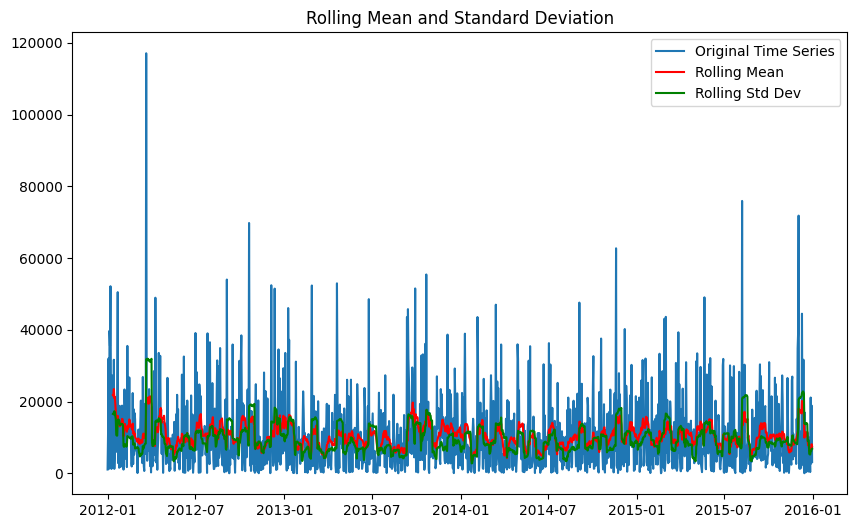

In [10]:
import pandas as pd

# Calculate rolling statistics
rolling_mean = time_series.rolling(window=12).mean()
rolling_std = time_series.rolling(window=12).std()

# Plot original series, rolling mean, and rolling std
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


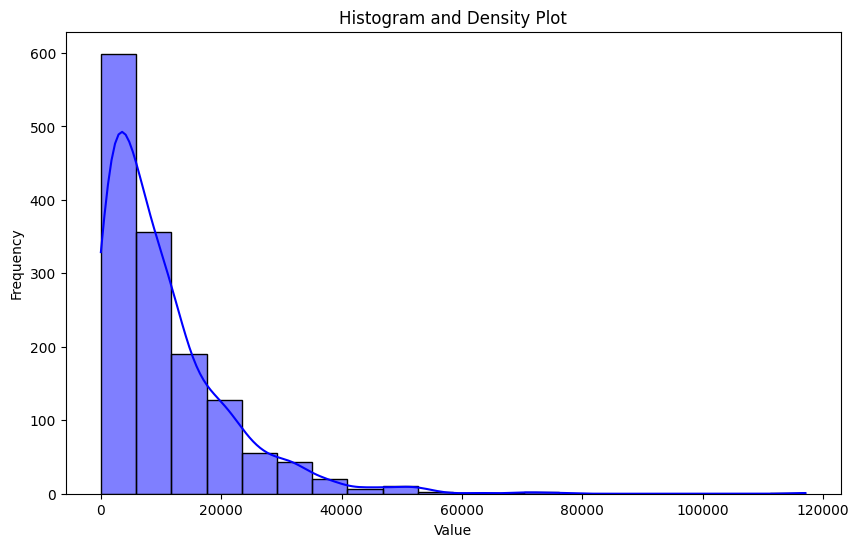

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(time_series, kde=True, color='blue', bins=20)
plt.title('Histogram and Density Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


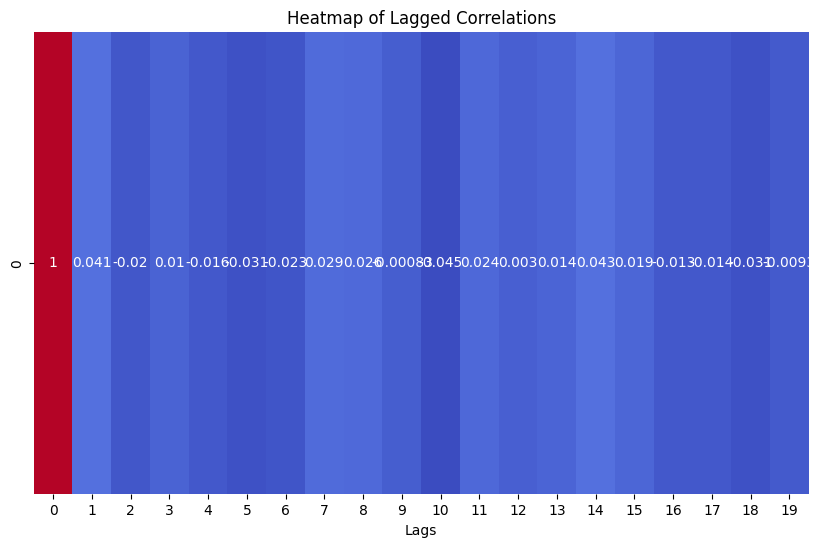

In [12]:
import numpy as np
import seaborn as sns

lags = 20
correlations = [time_series.autocorr(lag) for lag in range(lags)]

plt.figure(figsize=(10, 6))
sns.heatmap(np.array(correlations).reshape(1, -1), annot=True, cmap='coolwarm', cbar=False)
plt.title('Heatmap of Lagged Correlations')
plt.xlabel('Lags')
plt.show()


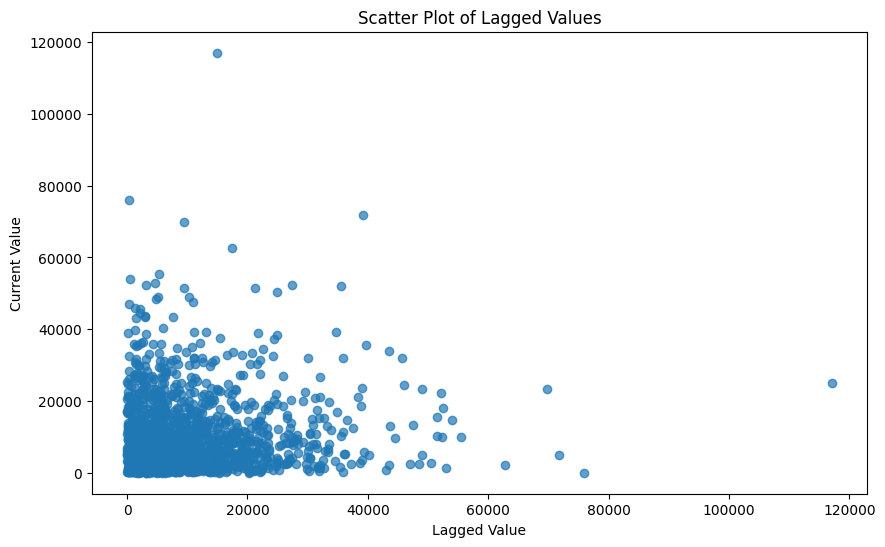

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(time_series[:-1], time_series[1:], alpha=0.7)
plt.title('Scatter Plot of Lagged Values')
plt.xlabel('Lagged Value')
plt.ylabel('Current Value')
plt.show()


## Correlation Matrix

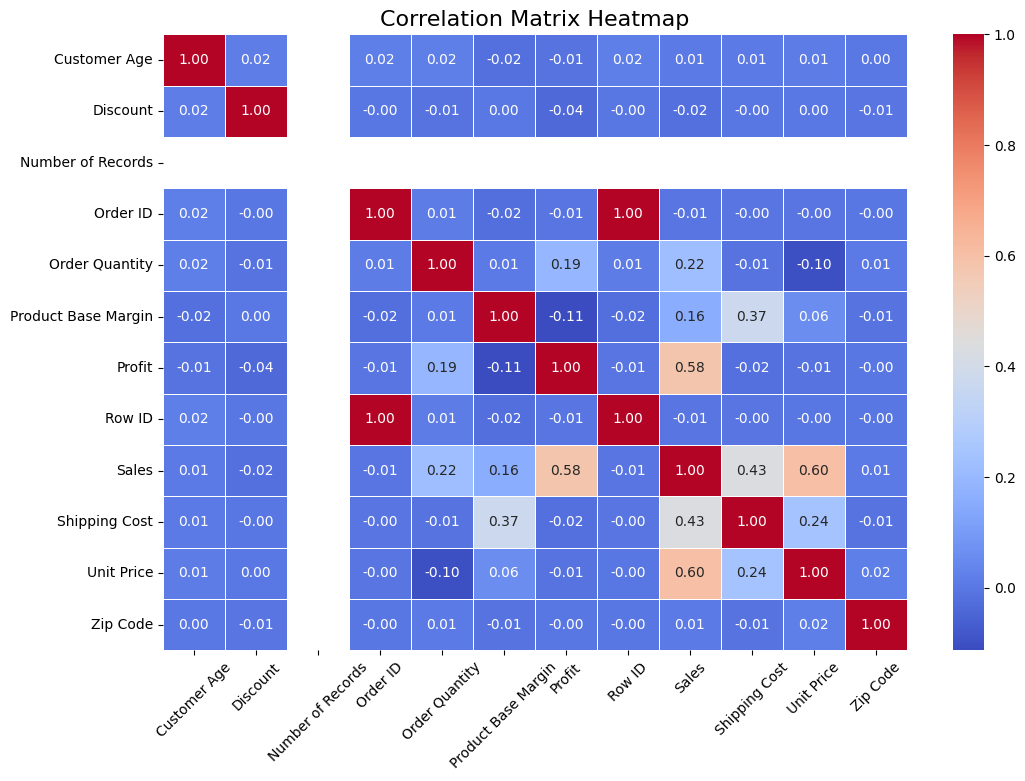

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()
